 # Step 1: Preparing the individual panels

In [3]:
## use these magic commands to automatically reload modules:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts/')
import rep_fig_vis as rfv  # package with general-purpose visualisation functions 
from tutorial_content import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fundamental format for plotting functions:
The first principle for making reproducible figures (RFs) is to "separate panel content from panel lay-out". This tutorial focuses on how to prepare your plotting functions accordingly. In essence, plotting functions should be of the following format:

In [4]:
def fundamental_plotting_function(ax=None, data=None, parameters=None):
    '''This function is a template for plotting functions. 
    It should be used for all plotting functions in this project. It is a wrapper for matplotlib.pyplot.plot().

    Parameters
    ----------
    ax : matplotlib.axes._subplots.AxesSubplot
        The axes on which to plot the data. If None, a new figure and axes will be created.
    data : 
        The hypothetical data to plot. 
    parameters : 
        The hypothetical parameters to use for the plot. 

    Returns
    -------
    ax : matplotlib.axes._subplots.AxesSubplot
        The axes on which the data was plotted.
    '''
    # See if axes were provided, if not create them:
    if ax is None:
        ax = plt.subplot(111)  # this creates a new figure and axes ('111' is short for: 1 row, 1 column, 1st plot)

    # Plot data using parameters

    # Return the axes
    return ax

## Example: specifying axes or not
In this tutorial, I'm not assuming/requiring that everyone will use the same structure/arguments for functions. Therefore, `data` and `parameters` weren't used, and are not assumed to be present in all plotting functions. However, `ax` should always be present. Let's look at a real, simple example below. Here, instead of using `parameters`, I created two separate arguments `x_label` and `y_label`. Some users may prefer to use a dictionary structure instead - the reproducible figure framework can be applied to any of these (and more).

In [5]:
def plot_scatter_data_simple(ax=None, data=None, x_label=None, y_label=None):
    '''Plot scatter data with axes labels'''
    # See if axes were provided, if not create them:
    if ax is None:
        ax = plt.subplot(111)  # this creates a new figure and axes ('111' is short for: 1 row, 1 column, 1st plot)

    if data is None:
        print('Using example data')
        data = np.random.rand(100, 2)

    assert type(data) == np.ndarray, 'Data must be a numpy array'
    assert data.shape[1] == 2, 'Data must have 2 columns'

    # Plot data
    ax.scatter(data[:, 0], data[:, 1])

    # Set axes labels
    if x_label is None:
        x_label = 'X'
    assert type(x_label) == str, 'x_label must be a string'
    ax.set_xlabel(x_label)
    if y_label is None:
        y_label = 'Y'
    assert type(y_label) == str, 'y_label must be a string'
    ax.set_ylabel(y_label)

    # Return the axes
    return ax

With the function `plot_scatter_data_simple()` in place, let's look at two different ways of plotting: first, without specifying the axes `ax`, and second, with specifcying `ax`:

Using example data


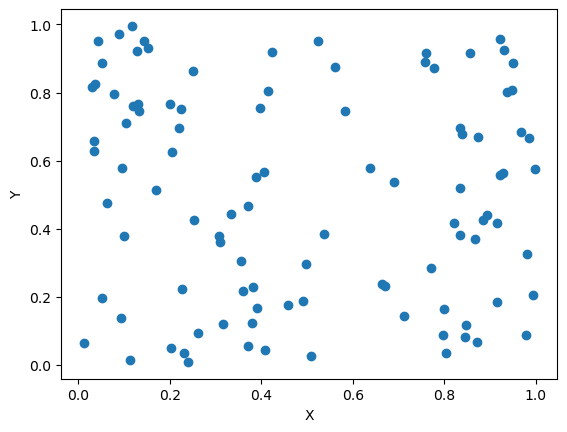

In [6]:
new_ax = plot_scatter_data_simple()

Using example data


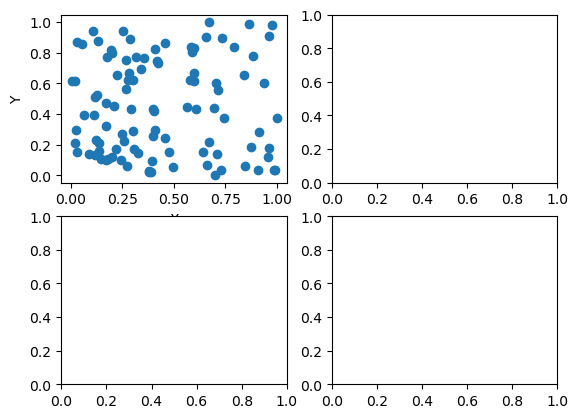

In [7]:
fig, axes = plt.subplots(2, 2)  # create a 2 rows x 2 columns grid of axes
ax_scatter = axes[0, 0]  # select the first axes in the grid
ax_scatter = plot_scatter_data_simple(ax=ax_scatter)  # plot data on the first axes

## Converting a 'Jupyter panel' to the reproducible figure format:
Let's now consider the situation that we have made a plot in Jupyter, without specifying axes or using a function, see the first cell below. We will then rewrite this as a function - showing that it retains all features it had before, but now with the added functionality that axes can be specified. The panel is now ready to be incorporated in a reproducible figure:

Text(0.5, 1.0, 'Scatter plot of two distributions')

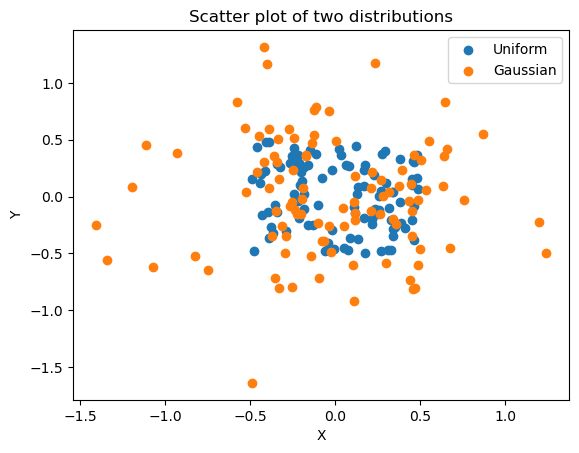

In [8]:
data_uniform = np.random.rand(100, 2) - 0.5
data_gaussian = np.random.randn(100, 2) / 2

plt.scatter(data_uniform[:, 0], data_uniform[:, 1], label='Uniform')
plt.scatter(data_gaussian[:, 0], data_gaussian[:, 1], label='Gaussian')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of two distributions')

And now in reproducible function format:

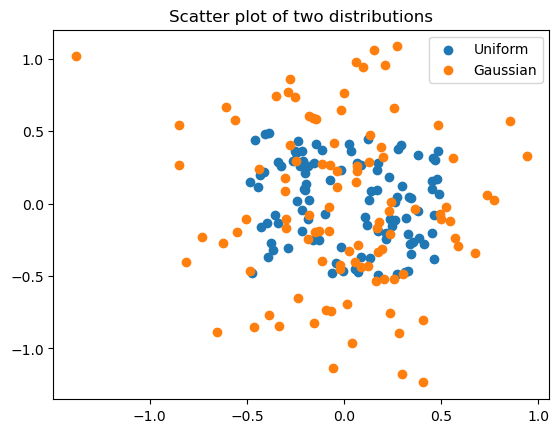

In [9]:
pltdata_uniform = np.random.rand(100, 2) - 0.5
data_gaussian = np.random.randn(100, 2) / 2

def plot_scatter_data_distr(ax=None, data=None, name_data=None,
                            x_label='', y_label='', 
                            title=None, plot_legend=False):
    if ax is None:
        ax = plt.subplot(111)
    assert type(data) == np.ndarray, 'Data must be a numpy array'
    assert data.shape[1] == 2, 'Data must have 2 columns'

    ax.scatter(data[:, 0], data[:, 1], label=name_data)
    if plot_legend:
        ax.legend()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if title is not None:
        ax.set_title(title)
    
    return ax

ax_scatter = plot_scatter_data_distr(data=data_uniform, name_data='Uniform')
ax_scatter = plot_scatter_data_distr(ax=ax_scatter, data=data_gaussian, name_data='Gaussian', 
                                     title='Scatter plot of two distributions', plot_legend=True)

And done! And now, we can easily reuse it in a different way:

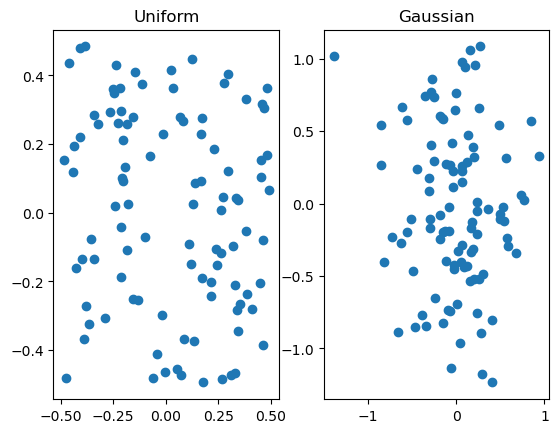

In [10]:
fig, ax = plt.subplots(1, 2)
ax_1 = plot_scatter_data_distr(data=data_uniform, title='Uniform', ax=ax[0])
ax_2 = plot_scatter_data_distr(data=data_gaussian, title='Gaussian', ax=ax[1])

Finally, as the plotting routine is now structured as a function, we can now store the function in a module (`.py` file) rather than this Jupyter notebook. This is better because:
1. It allows for version control (e.g., using Git)
2. It makes it easier for you to use this function again in a different project/notebook. 
3. It makes it easier for others to use your functions. 
4. It eliminates the risk that latent variables in this notebook (i.e., previously defined variables that are still in memory) interfere with the plot.

I have stored this scatter plot functions in the module `tutorial_rf_functions.py` in this repository. This module can be imported in this notebook using the following line:

In [12]:
from tutorial_content import tutorial_rf_functions as tut  # functions written specifically for this tutorial 

And by running the following two 'magic' commands __before__ importing functions (we'll do this right away in the next step), any changes to modules are automatically updated in your Jupyter notebook, so you don't need to worry about reloading etc.

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


And now, we can use this function directly!

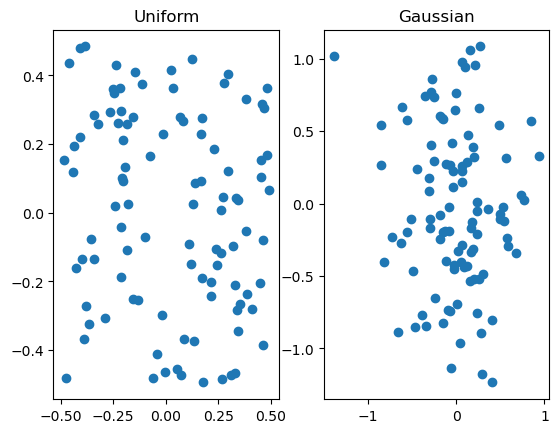

In [14]:
fig, ax = plt.subplots(1, 2)
ax_1 = tut.plot_scatter_data_distr(data=data_uniform, title='Uniform', ax=ax[0])
ax_2 = tut.plot_scatter_data_distr(data=data_gaussian, title='Gaussian', ax=ax[1])

## Conclusion:
The first step to creating reproducible figures is writing plotting functions, that take axis `ax` as an argument. Once plotting routines as structured as functions, we can start changing the lay-out of the axes (independent of the axis content). In the next step, we will look at exactly this. 

[Go to next tutorial](https://github.com/vdplasthijs/reproducible_figures/blob/main/tutorial/RF2:-%20Composing%20axes%20for%20a%20multi-panel%20figure.ipynb)


<button onclick="window.location.href='https://github.com/vdplasthijs/reproducible_figures/blob/main/tutorial/RF2:-%20Composing%20axes%20for%20a%20multi-panel%20figure.ipynb';">Go to next tutorial</button>